In [1]:
import pandas as pd
import os
from datetime import date, datetime, timedelta
import numpy as np
import seaborn as sns

C:\Users\marie\AppData\Local\Temp\ipykernel_31160\1657975687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dirpath = os.getcwd()
data_path = os.path.join(dirpath, "..", "data")

df = pd.read_csv(os.path.join(data_path, "delpro_visit_lactation.csv")) # , header = 0,  names = names, dtype = dtypes)
df = df[df['date'].notna()]

df["kickoff_lf_bin"]= [0 if "Un" in rec else 1 for rec in df.kickoff_lf]
df["kickoff_lr_bin"]= [0 if "Un" in rec else 1 for rec in df.kickoff_lr]
df["kickoff_rf_bin"]= [0 if "Un" in rec else 1 for rec in df.kickoff_rf]
df["kickoff_rr_bin"]= [0 if "Un" in rec else 1 for rec in df.kickoff_rr]

df["kickoff_front"] = [1 if (rec[0] + rec[1])>0  else 0 for rec in zip(df.kickoff_rf_bin, df.kickoff_lf_bin)]
df["kickoff_back"] = [1 if (rec[0] + rec[1])>0  else 0 for rec in zip(df.kickoff_rr_bin, df.kickoff_lr_bin)]
df["kickoff_any"] = [1 if (rec[0] + rec[1]+ rec[1] + rec[2])>0  else 0 for rec in zip(df.kickoff_rr_bin, df.kickoff_lr_bin, df.kickoff_rf_bin, df.kickoff_lf_bin)]

In [3]:
agg_df = df[["animal_number", 'kickoff_lf_bin', 'kickoff_lr_bin','kickoff_rf_bin', 'kickoff_rr_bin', 'kickoff_any', "kickoff_back", "kickoff_front", "date", 'yield']].groupby("animal_number")\
    .agg(kickoff_lf_sum = ('kickoff_lf_bin', 'sum'), 
        kickoff_lr_sum = ('kickoff_lr_bin', 'sum'),
        kickoff_rf_sum = ('kickoff_rf_bin', 'sum'),
        kickoff_rr_sum = ('kickoff_rr_bin', 'sum'), 
        kickoff_front_sum = ("kickoff_front", "sum"),
        kickoff_back_sum = ("kickoff_back", "sum"),
        kickoff_any_sum = ("kickoff_any", "sum"),
        total_yield = ('yield', 'sum'),
        total_visits = ("date", "count"))\
    .reset_index()

agg_df['kickoff_lf_perc'] = (agg_df['kickoff_lf_sum']/agg_df['total_visits'])*100
agg_df['kickoff_lr_perc'] = (agg_df['kickoff_lr_sum']/agg_df['total_visits'])*100
agg_df['kickoff_rf_perc'] = (agg_df['kickoff_rf_sum']/agg_df['total_visits'])*100
agg_df['kickoff_rr_perc'] = (agg_df['kickoff_rr_sum']/agg_df['total_visits'])*100
agg_df['kickoff_front_perc'] = (agg_df['kickoff_front_sum']/agg_df['total_visits'])*100
agg_df['kickoff_back_perc'] = (agg_df['kickoff_back_sum']/agg_df['total_visits'])*100
agg_df['kickoff_any_perc'] = (agg_df['kickoff_any_sum']/agg_df['total_visits'])*100

agg_df.to_csv(os.path.join(data_path, "kickoff_lactation.csv")), index = False)

SyntaxError: unmatched ')' (901120860.py, line 21)

<Axes: xlabel='kickoff_any_perc', ylabel='total_yield'>

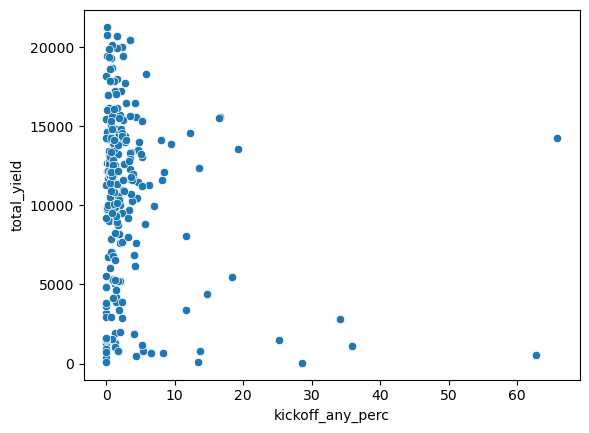

In [4]:
sns.scatterplot(data=agg_df, x='kickoff_any_perc', y="total_yield")

<Axes: xlabel='kickoff_any_perc', ylabel='total_visits'>

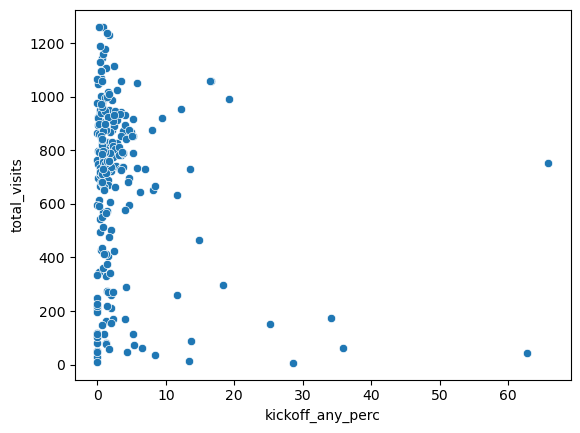

In [5]:
sns.scatterplot(data=agg_df, x='kickoff_any_perc', y="total_visits")